# Car Price Prediction With Machine Learning

The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project is for you.

## Importing Libraries

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

## Reading the Data Set

In [76]:
data = pd.read_csv("/content/drive/MyDrive/car_data.csv")
print("Data Set imported and read Successfully!!!")

Data Set imported and read Successfully!!!


In [77]:
# Summary of Data Set: 301 rows, 9 columns, No Null Values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Dimensions of Data Set

In [78]:
data.shape

(301, 9)

In [79]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Finding Duplicate data in the data set

In [80]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

There is No duplicate data in the data set.

In [81]:
data.Selling_type.unique()

array(['Dealer', 'Individual'], dtype=object)

In [82]:
data.Owner.unique()

array([0, 1, 3])

In [83]:
data.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [84]:
data.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [85]:
data.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

## Data Cleaning:

Here the data set contains the bikes along with the cars which can influence the price prediction of cars. Hence deleting the bike items from the data set we can predict the accurate price of cars.

In [86]:
# list of items to delete called "items_to_delete"
items_to_delete = {
    'Royal Enfield Thunder 500', 'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
    'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R', 'Royal Enfield Thunder 350',
    'KTM 390 Duke ', 'Mahindra Mojo XT300', 'Bajaj Pulsar RS200', 'Royal Enfield Bullet 350',
    'Royal Enfield Classic 500', 'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
    'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160', 'Bajaj Pulsar 150', 'Honda CBR 150',
    'Hero Extreme', 'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street', 'Yamaha FZ  v 2.0',
    'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F', 'TVS Apache RTR 180', 'Hero Passion X pro',
    'Bajaj Pulsar NS 200', 'Yamaha Fazer ', 'Honda Activa 4G', 'TVS Sport ', 'Honda Dream Yuga ',
    'Bajaj Avenger Street 220', 'Hero Splender iSmart', 'Activa 3g', 'Hero Passion Pro',
    'Honda CB Trigger', 'Yamaha FZ S ', 'Bajaj Pulsar 135 LS', 'Activa 4g', 'Honda CB Unicorn',
    'Hero Honda CBZ extreme', 'Honda Karizma', 'Honda Activa 125', 'TVS Jupyter',
    'Hero Honda Passion Pro', 'Hero Splender Plus', 'Honda CB Shine', 'Bajaj Discover 100',
    'Suzuki Access 125', 'TVS Wego', 'Honda CB twister', 'Hero Glamour', 'Hero Super Splendor',
    'Bajaj Discover 125', 'Hero Hunk', 'Hero  Ignitor Disc', 'Hero  CBZ Xtreme', 'Bajaj  ct 100'
}

# Filter the DataFrame to exclude the items in the list
data = data[~data['Car_Name'].isin(items_to_delete)]

# The "data" DataFrame now contains only the items not in the list
data.Car_Name.unique()


array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'i20', 'grand i10', 'i10', 'eon', 'xcent',
       'elantra', 'creta', 'verna', 'city', 'brio', 'amaze', 'jazz'],
      dtype=object)

## Data Wrangling:

To know the exact age of the car, we have to know the difference between the current year and the Manufactured year respectively.

In [87]:
# Creating a new feature called total no. of years old my car,bcz It's important to know how many years old the car is.
data['Car_Age'] = 2023-data['Year']

#It's time to drop the Year column after the needed info is derived.
data.drop(labels='Year',axis=1,inplace=True)

<ipython-input-87-ca2d910c96e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Car_Age'] = 2023-data['Year']
<ipython-input-87-ca2d910c96e9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(labels='Year',axis=1,inplace=True)


In [88]:
data.head()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [89]:
data.shape

(200, 9)

In [90]:
print(data.describe())

       Selling_Price  Present_Price     Driven_kms       Owner     Car_Age
count     200.000000     200.000000     200.000000  200.000000  200.000000
mean        6.691650      10.980750   41404.880000    0.035000    9.410000
std         5.150122       8.877698   27415.814725    0.253171    2.886792
min         0.350000       2.280000    2071.000000    0.000000    5.000000
25%         3.637500       6.467500   22332.750000    0.000000    7.000000
50%         5.250000       8.450000   40000.000000    0.000000    9.000000
75%         7.562500      13.495000   53513.750000    0.000000   11.000000
max        35.000000      92.600000  197176.000000    3.000000   20.000000


## Data Visualization:
Building the plots between the columns to retrive outcomes from it.

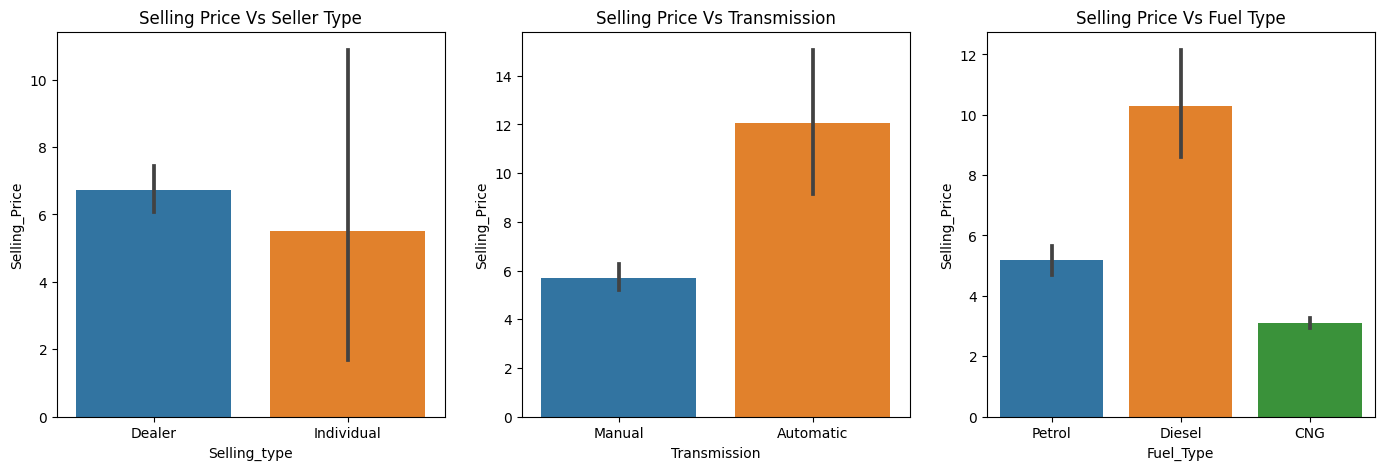

In [91]:
plt.figure(figsize=[17,5])

plt.subplot(1,3,1)
sns.barplot(x='Selling_type', y='Selling_Price', data=data)
plt.title('Selling Price Vs Seller Type')

plt.subplot(1,3,2)
sns.barplot(x='Transmission', y='Selling_Price', data=data)
plt.title('Selling Price Vs Transmission')

plt.subplot(1,3,3)
sns.barplot(x='Fuel_Type', y='Selling_Price', data=data)
plt.title('Selling Price Vs Fuel Type')

plt.show()


Pair Plot:

<ipython-input-92-05bc8b3f48ba>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.pairplot(data.corr())


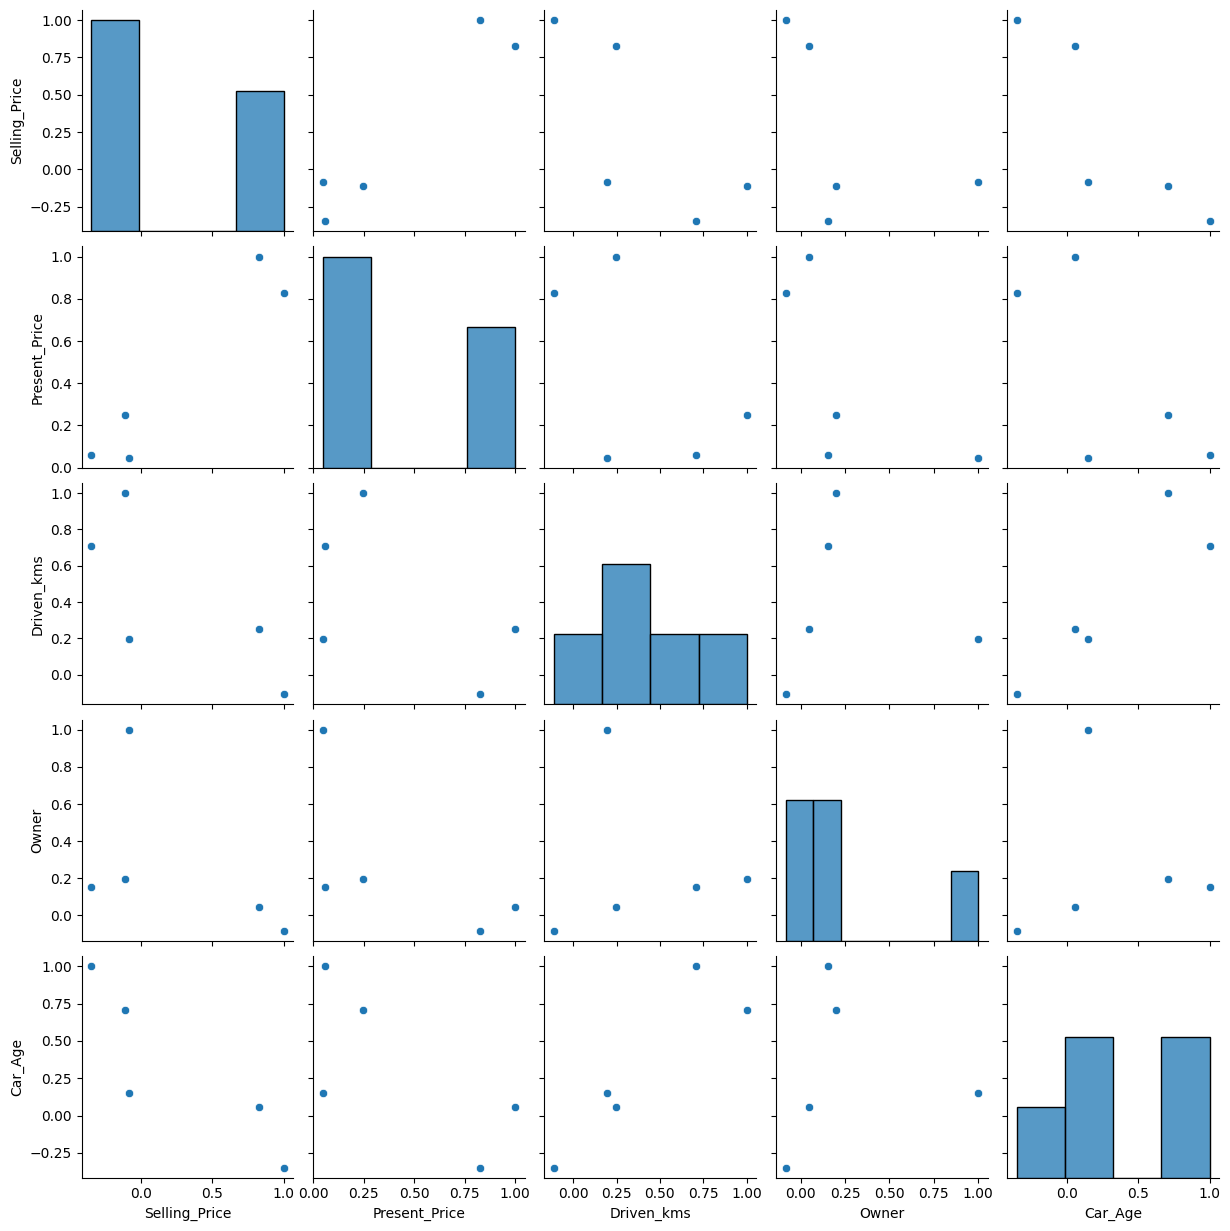

In [92]:
import seaborn as sns
sns.pairplot(data.corr())

Heat Map:

<ipython-input-93-42104d25d593>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


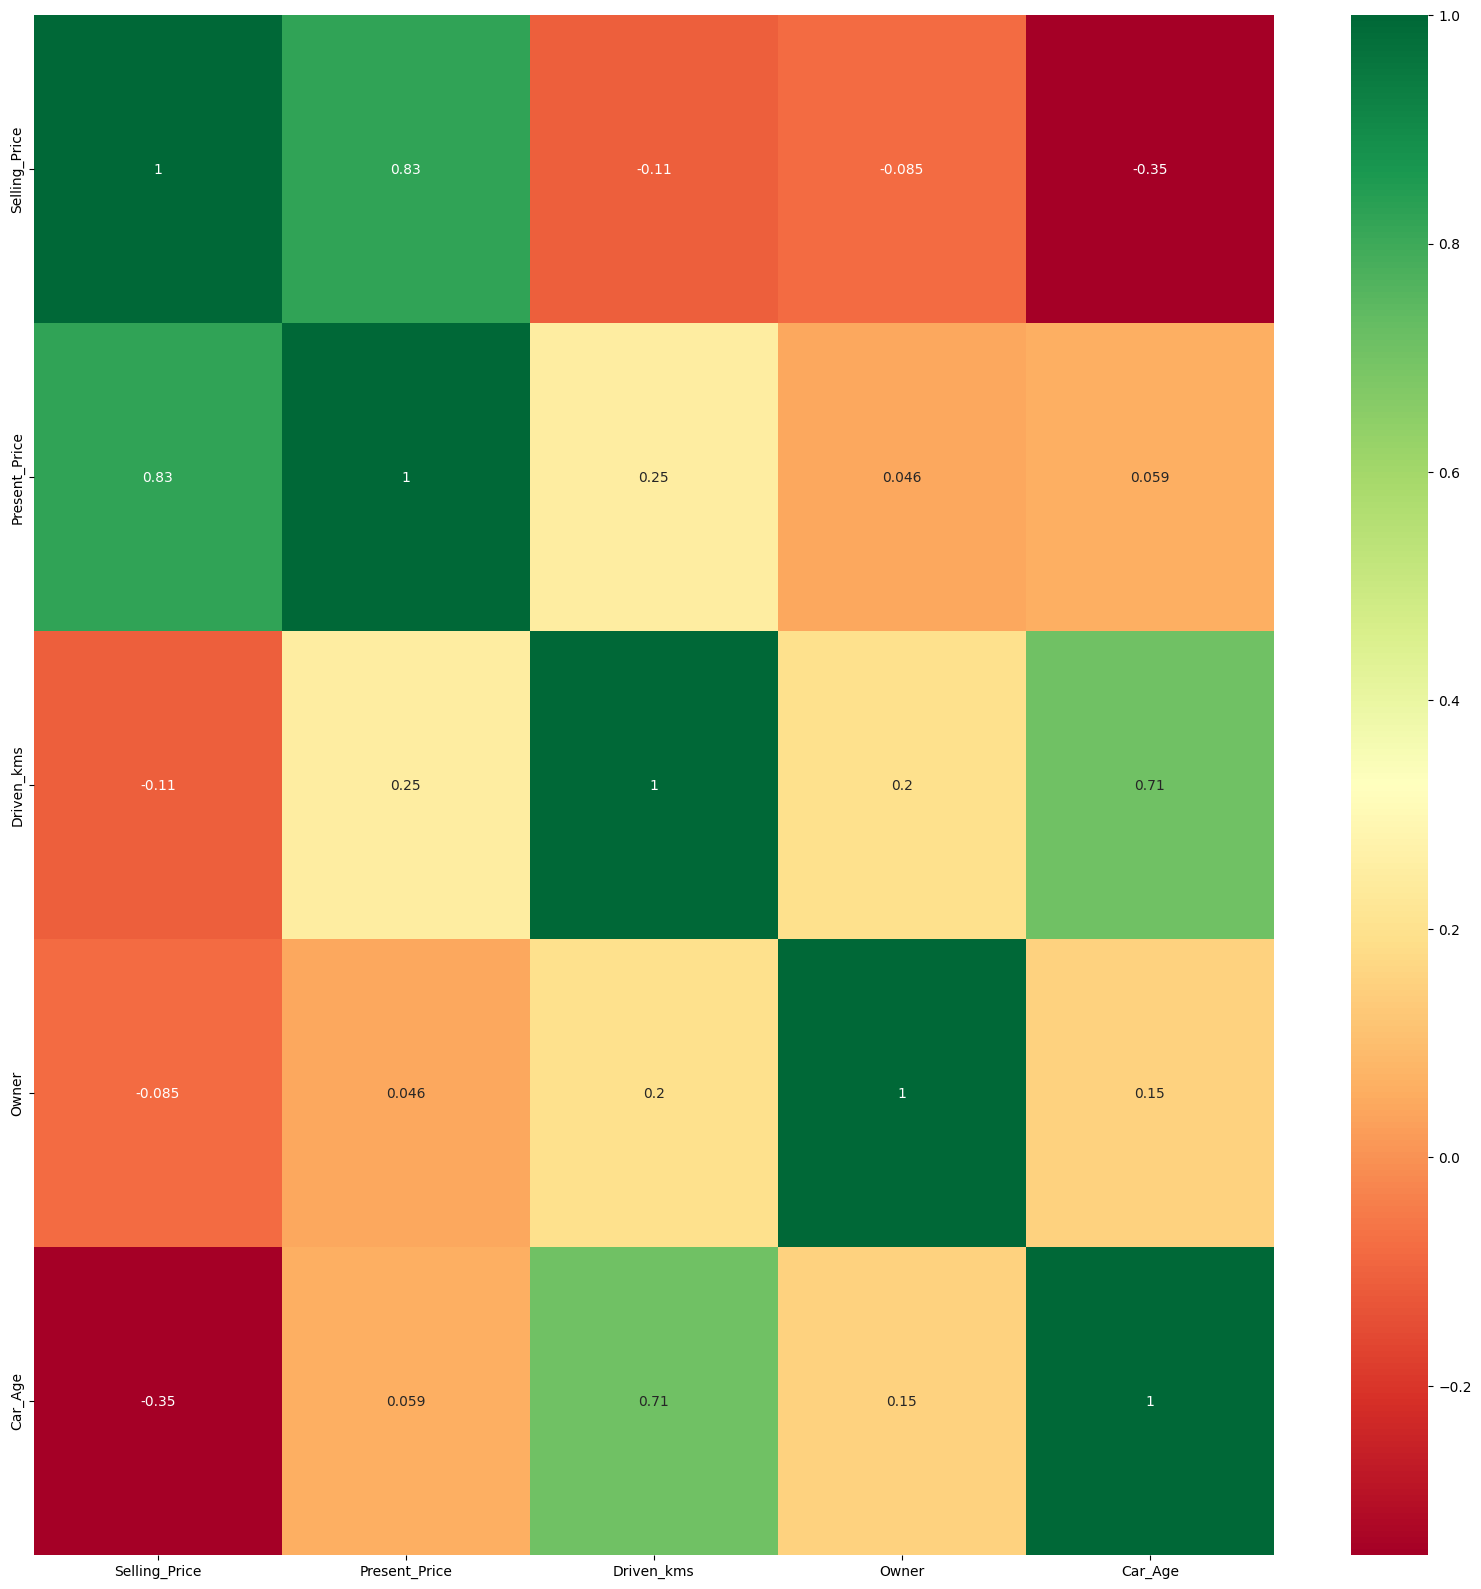

In [93]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Dist Plot:

<ipython-input-94-a694f8fa46c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Selling_Price'])


<Axes: xlabel='Selling_Price', ylabel='Density'>

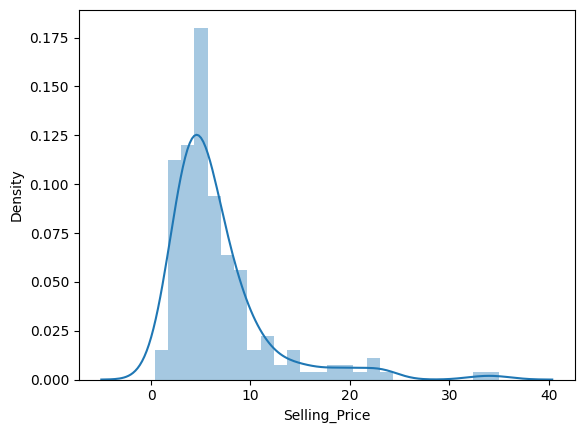

In [94]:
sns.distplot(data['Selling_Price'])

<ipython-input-95-c5e0b0937721>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Present_Price'])


<Axes: xlabel='Present_Price', ylabel='Density'>

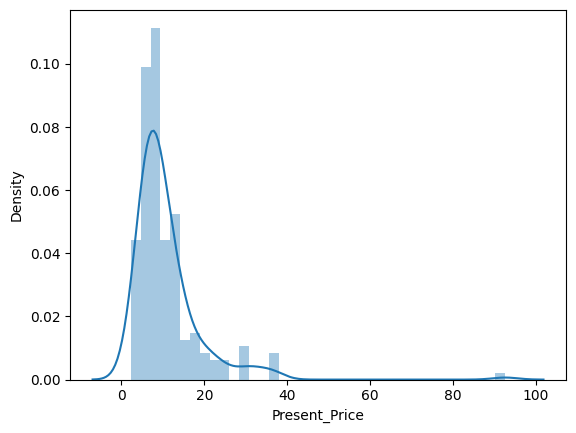

In [95]:
# we continue treating other numeric values the same way
sns.distplot(data['Present_Price'])

<ipython-input-96-90eb0cbbd0aa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Driven_kms'])


<Axes: xlabel='Driven_kms', ylabel='Density'>

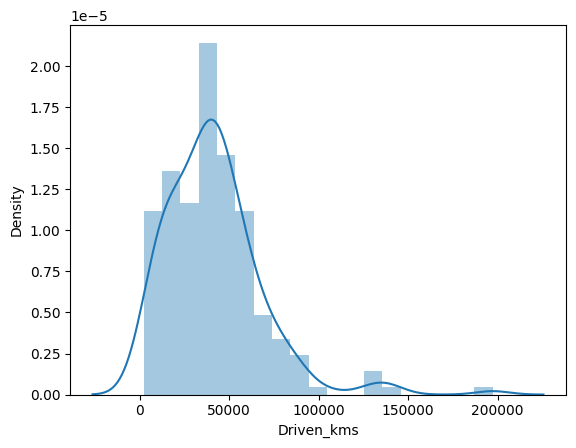

In [96]:
sns.distplot(data['Driven_kms'])

## Data Encoding
Categorical data Distribution

In [97]:
# encoding "Fuel_Type" Column
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
data.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [98]:
data

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,ritz,3.35,5.59,27000,0,0,0,0,9
1,sx4,4.75,9.54,43000,1,0,0,0,10
2,ciaz,7.25,9.85,6900,0,0,0,0,6
3,wagon r,2.85,4.15,5200,0,0,0,0,12
4,swift,4.60,6.87,42450,1,0,0,0,9
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,1,0,0,0,7
297,brio,4.00,5.90,60000,0,0,0,0,8
298,city,3.35,11.00,87934,0,0,0,0,14
299,city,11.50,12.50,9000,1,0,0,0,6


In [99]:
X = data.drop(['Car_Name','Selling_Price'],axis=1)
Y = data['Selling_Price']

In [100]:
X

,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,5.59,27000,0,0,0,0,9
1,9.54,43000,1,0,0,0,10
2,9.85,6900,0,0,0,0,6
3,4.15,5200,0,0,0,0,12
4,6.87,42450,1,0,0,0,9
...,...,...,...,...,...,...,...
296,11.60,33988,1,0,0,0,7
297,5.90,60000,0,0,0,0,8
298,11.00,87934,0,0,0,0,14
299,12.50,9000,1,0,0,0,6


In [101]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 200, dtype: float64

## Evaluation and Visualization :

Step 1: Splitting the dataset into Training and Testing Datasets

Here we have taken test data size of 30 percent and to train the data we've taken 70 percent of data.

In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

## Selecting the Model

In [103]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

## Evaluating the Model

In [104]:
y_pred = model.predict(X_test)

In [105]:
y_pred

array([ 8.04916892,  2.26550353,  7.18845601,  8.46360638,  6.87823961,
        8.13527107, 10.45034683,  5.7264504 ,  9.48779494,  7.15095858,
        4.84122275,  4.57095103,  0.6916399 ,  2.12337295, 11.00012596,
        7.54926913,  7.28068773,  7.31981517, -4.82166997,  5.4738742 ,
        4.36066622,  3.40844958,  9.95950916,  8.16519826,  8.64453165,
        7.65878332,  5.02519201,  5.77750843,  6.87182817,  1.13107848,
        8.1729582 ,  7.15466266,  4.35539371,  8.40233015,  5.73786117,
        4.65590132,  6.63133127,  6.06999781,  9.43560505,  6.97758305,
        7.31474825, 16.05435855,  2.70708873,  5.56949548,  6.60177176,
       21.40126093,  8.56054909,  4.62653199,  4.47640615,  6.4865621 ,
        7.1009487 ,  2.5170868 ,  9.29315543, 11.45680361,  9.98628611,
        2.02643146,  4.53479193,  5.79233128,  8.6840767 ,  4.66126755])

Calculating the performance of the Metrics

In [106]:
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" R-Squred (R2): {r2:.2f}")

 Mean Squared Error (MSE): 3.78
 R-Squred (R2): 0.78


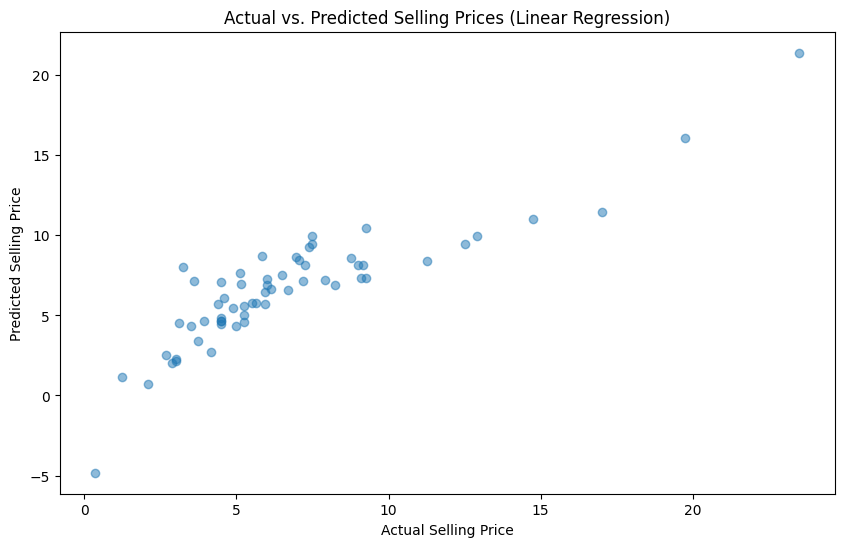

In [107]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Prices (Linear Regression)')
plt.show()

In [108]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=0)

# Fit the model to the training data
rf_model.fit(X_train, Y_train)

# Make predictions on the test data
rf_Y_pred = rf_model.predict(X_test)

# Calculate performance metrics for the Random Forest model
rf_mse = mean_squared_error(Y_test, rf_Y_pred)*100
rf_r2 = r2_score(Y_test, rf_Y_pred)*100

print(f"Random Forest Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"Random Forest R-squared (R2): {rf_r2:.2f}")


Random Forest Mean Squared Error (MSE): 150.70
Random Forest R-squared (R2): 91.22


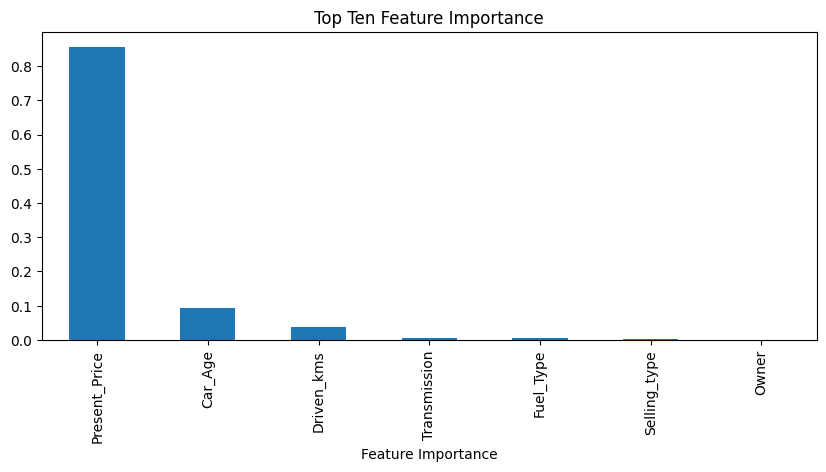

In [109]:
feature_importance = pd.Series(rf_model.feature_importances_, index = X.columns)
plt.figure(figsize=(10,4))
feature_importance.nlargest(10).plot(kind = 'bar')
plt.xlabel('Feature Importance')
plt.title('Top Ten Feature Importance')
plt.show()